In [1]:
#!pip3 install requests
#!pip install folium
#!pip install plotly
import requests
import json
import pandas as pd
from pandas import json_normalize
import datetime
import folium
from folium.plugins import HeatMap
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#url for Police Department Incident Reports: 2018 to Present (dataset #1)
url = "https://data.sfgov.org/resource/wg3w-h783.json?$limit=1000"
#url for Police Department Incident Reports: Historical 2003 to May 2018 (dataset #2)
url_2 = "https://data.sfgov.org/resource/tmnf-yvry.json?$limit=2000"

In [3]:
#returns a JSON object of the result (url)
response = requests.get(url).json()

In [4]:
#returns a JSON object of the result (url_2)
response_2 = requests.get(url_2).json()

In [5]:
#Normalize semi-structured JSON data into a flat table. (df)
res = json_normalize(response)
df = pd.DataFrame(res)

In [6]:
##Normalize semi-structured JSON data into a flat table. (df_2)
res_2 = json_normalize(response_2)
df_2 = pd.DataFrame(res_2)

In [7]:
#extract the months from incident date before dropping it (dataset #1)
df['incident_month'] = pd.DatetimeIndex(df['incident_date']).month

In [8]:
df["analysis_neighborhood"].unique()

array([nan, 'Excelsior', 'Russian Hill', 'Lone Mountain/USF',
       'Pacific Heights', 'Bayview Hunters Point', 'Glen Park', 'Mission',
       'Tenderloin', 'Hayes Valley', 'Western Addition', 'Outer Mission',
       'Marina', 'South of Market', 'Japantown', 'McLaren Park',
       'Presidio Heights', 'Mission Bay', 'Nob Hill', 'North Beach',
       'Financial District/South Beach', 'West of Twin Peaks',
       'Chinatown', 'Haight Ashbury', 'Castro/Upper Market',
       'Sunset/Parkside', 'Potrero Hill', 'Lakeshore', 'Outer Richmond',
       'Inner Sunset', 'Twin Peaks', 'Oceanview/Merced/Ingleside',
       'Portola', 'Presidio', 'Bernal Heights', 'Golden Gate Park',
       'Noe Valley', 'Visitacion Valley', 'Inner Richmond',
       'Treasure Island', 'Lincoln Park', 'Seacliff'], dtype=object)

In [9]:
#dropping columns
df = df.drop(['incident_datetime', 'row_id','report_type_description',
'report_datetime','incident_time','incident_date','incident_day_of_week',':@computed_region_nqbw_i6c3',
 ':@computed_region_h4ep_8xdi','report_type_code',
 ':@computed_region_n4xg_c4py',
 ':@computed_region_jg9y_a9du',
 ':@computed_region_jwn9_ihcz',
 ':@computed_region_26cr_cadq','analysis_neighborhood',
 ':@computed_region_qgnn_b9vv', 'police_district','incident_subcategory',
 'point.type', 'supervisor_district', 'resolution','filed_online','incident_number', 'incident_id', 'cad_number', 'cnn', 'intersection','point.coordinates',], axis = 1)

In [10]:
#dropping null values
df = df.dropna(how="any")

#dropping 2023 data and reset the index
df = df.drop(df.index[df['incident_year'] == "2023"])
df = df.reset_index(drop = True)

In [11]:
#extract the months and years from incident date before dropping it (dataset #2)

df_2['incident_month'] = pd.DatetimeIndex(df_2['date']).month
df_2['incident_year'] = pd.DatetimeIndex(df_2['date']).year

In [12]:
#dropping columns (dataset #2)
df_2= df_2.drop(['time','resolution', 'location.coordinates', 'location.type', ':@computed_region_26cr_cadq',
 ':@computed_region_rxqg_mtj9',
 ':@computed_region_bh8s_q3mv','dayofweek','pdid','pddistrict',
 'incidntnum',':@computed_region_6qbp_sg9q',
 ':@computed_region_qgnn_b9vv','date',
 'address',
 ':@computed_region_ajp5_b2md',
 ':@computed_region_yftq_j783',
 ':@computed_region_p5aj_wyqh',
 ':@computed_region_fyvs_ahh9',
 ':@computed_region_6pnf_4xz7',
 ':@computed_region_jwn9_ihcz',
 ':@computed_region_9dfj_4gjx',
 ':@computed_region_4isq_27mq',
 ':@computed_region_pigm_ib2e',
 ':@computed_region_9jxd_iqea',
 ':@computed_region_6ezc_tdp2',
 ':@computed_region_h4ep_8xdi',
 ':@computed_region_n4xg_c4py',
 ':@computed_region_fcz8_est8',
 ':@computed_region_nqbw_i6c3',
 ':@computed_region_2dwj_jsy4'], axis = 1)

In [13]:
#rename columns (dataset #2)
df_2.rename(columns = {'category':'incident_category', 'descript':'incident_description', 'y':'latitude', 'x':'longitude'}, inplace = True)

In [14]:
#dropping null values (dataset #2)
df_2 = df_2.dropna(how="any")
#changing incident_year type to mearge the two Dataframes (dataset #2)
df_2.astype({'incident_year': 'object'},{}).dtypes

incident_code           object
incident_category       object
incident_description    object
longitude               object
latitude                object
incident_month           int64
incident_year           object
dtype: object

In [15]:
#creating a combined Dataframe 
crime_df = pd.concat([df, df_2], ignore_index=True, sort=False)
crime_df.astype({'incident_category': 'str'},{'incident_description' : 'str'}).dtypes

incident_year           object
incident_code           object
incident_category       object
incident_description    object
latitude                object
longitude               object
incident_month           int64
dtype: object

In [16]:
# Display the new Dataframe created
crime_df

,incident_year,incident_code,incident_category,incident_description,latitude,longitude,incident_month
0,2021,75000,Missing Person,Found Person,37.72623624315635,-122.43362359230944,5
1,2021,09320,Fraud,"Access Card, incl. Credit, Phone, ATM, Fraudul...",37.80549664761133,-122.42200682265661,5
2,2021,65010,Traffic Violation Arrest,Traffic Violation Arrest,37.77279045274103,-122.44749724585684,5
3,2021,27195,Other Miscellaneous,Trespassing,37.78983697125977,-122.43402709034117,5
4,2021,16710,Drug Offense,"Narcotics Paraphernalia, Possession of",37.73985319897475,-122.39126842523832,5
...,...,...,...,...,...,...,...
2929,2006,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,37.7796593209531,-122.409286020933,11
2930,2004,03014,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",37.7527378805766,-122.410067981394,12
2931,2008,71000,NON-CRIMINAL,LOST PROPERTY,37.7650501214668,-122.419671780296,4
2932,2003,07025,VEHICLE THEFT,STOLEN TRUCK,37.7356625997873,-122.392217325574,11


In [17]:
# Changing letters to lower case in both incident_category & incident_description columns
crime_df["incident_category"] = crime_df["incident_category"].str.lower()
crime_df["incident_description"] = crime_df["incident_description"].str.lower()

#know all type of unique values in column
crime_df["incident_category"].unique()

array(['missing person', 'fraud', 'traffic violation arrest',
       'other miscellaneous', 'drug offense', 'motor vehicle theft',
       'other offenses', 'drug violation', 'burglary', 'non-criminal',
       'robbery', 'warrant', 'larceny theft', 'recovered vehicle',
       'malicious mischief', 'arson', 'stolen property', 'assault',
       'weapons offense', 'disorderly conduct', 'suspicious occ',
       'courtesy report', 'case closure', 'fire report',
       'weapons carrying etc', 'lost property',
       'miscellaneous investigation', 'vandalism',
       'forgery and counterfeiting',
       'offences against the family and children', 'sex offense', 'other',
       'traffic collision', 'vehicle impounded', 'vehicle theft',
       'trespass', 'larceny/theft', 'warrants', 'drug/narcotic',
       'liquor laws', 'weapon laws', 'sex offenses, forcible',
       'secondary codes', 'kidnapping', 'forgery/counterfeiting',
       'prostitution', 'drunkenness', 'bad checks',
       'driving u

In [18]:
crime_df['incident_category']

0                 missing person
1                          fraud
2       traffic violation arrest
3            other miscellaneous
4                   drug offense
                  ...           
2929               larceny/theft
2930                     robbery
2931                non-criminal
2932               vehicle theft
2933      sex offenses, forcible
Name: incident_category, Length: 2934, dtype: object

In [19]:
# replace values.
rep = {
    "drug violation":"drug offense",
    'drug/narcotic':"drug offense",
    "forgery/counterfeiting" : "forgery and counterfeiting",
    "larceny/theft" : "larceny theft",
    "human trafficking, commercial sex acts" : "human trafficking (a), commercial sex acts",
    "motor vehicle theft?" : "motor vehicle theft",
    "other miscellaneous" : "other",
    "other offenses" : "other",
    "sex offenses, forcible" : "sex offense",
    'sex offenses, non forcible' : 'sex offense',
    'suspicious occ' : 'suspicious',
    'warrants': 'warrant',
    'weapons offence': 'weapons offense',
    'weapons carrying etc' : 'weapon laws'
}

crime_df.replace({"incident_category": rep})
crime_df

,incident_year,incident_code,incident_category,incident_description,latitude,longitude,incident_month
0,2021,75000,missing person,found person,37.72623624315635,-122.43362359230944,5
1,2021,09320,fraud,"access card, incl. credit, phone, atm, fraudul...",37.80549664761133,-122.42200682265661,5
2,2021,65010,traffic violation arrest,traffic violation arrest,37.77279045274103,-122.44749724585684,5
3,2021,27195,other miscellaneous,trespassing,37.78983697125977,-122.43402709034117,5
4,2021,16710,drug offense,"narcotics paraphernalia, possession of",37.73985319897475,-122.39126842523832,5
...,...,...,...,...,...,...,...
2929,2006,06244,larceny/theft,grand theft from locked auto,37.7796593209531,-122.409286020933,11
2930,2004,03014,robbery,"robbery on the street, strongarm",37.7527378805766,-122.410067981394,12
2931,2008,71000,non-criminal,lost property,37.7650501214668,-122.419671780296,4
2932,2003,07025,vehicle theft,stolen truck,37.7356625997873,-122.392217325574,11


In [20]:
#heat_m = folium.Map(location = [37.7749 , -122.4194], zoom_start = 13 , tiles = 'Stamen Terrain')
#heat_mat = crime_df[['latitude', 'longitude']].to_numpy()
#HeatMap(heat_mat,radius= 0, blur=10).add_to(heat_m)

In [21]:
#heat_m

[Text(0, 0, 'larceny/theft'),
 Text(1, 0, 'other offenses'),
 Text(2, 0, 'non-criminal'),
 Text(3, 0, 'assault'),
 Text(4, 0, 'larceny theft'),
 Text(5, 0, 'burglary'),
 Text(6, 0, 'drug/narcotic'),
 Text(7, 0, 'vehicle theft'),
 Text(8, 0, 'vandalism'),
 Text(9, 0, 'suspicious occ'),
 Text(10, 0, 'robbery'),
 Text(11, 0, 'warrants'),
 Text(12, 0, 'malicious mischief'),
 Text(13, 0, 'other miscellaneous'),
 Text(14, 0, 'fraud'),
 Text(15, 0, 'missing person'),
 Text(16, 0, 'motor vehicle theft'),
 Text(17, 0, 'recovered vehicle'),
 Text(18, 0, 'warrant'),
 Text(19, 0, 'prostitution'),
 Text(20, 0, 'forgery/counterfeiting'),
 Text(21, 0, 'disorderly conduct'),
 Text(22, 0, 'lost property'),
 Text(23, 0, 'secondary codes'),
 Text(24, 0, 'weapon laws'),
 Text(25, 0, 'drug offense'),
 Text(26, 0, 'stolen property'),
 Text(27, 0, 'trespass'),
 Text(28, 0, 'offences against the family and children'),
 Text(29, 0, 'sex offenses, forcible'),
 Text(30, 0, 'weapons offense'),
 Text(31, 0, 'misce

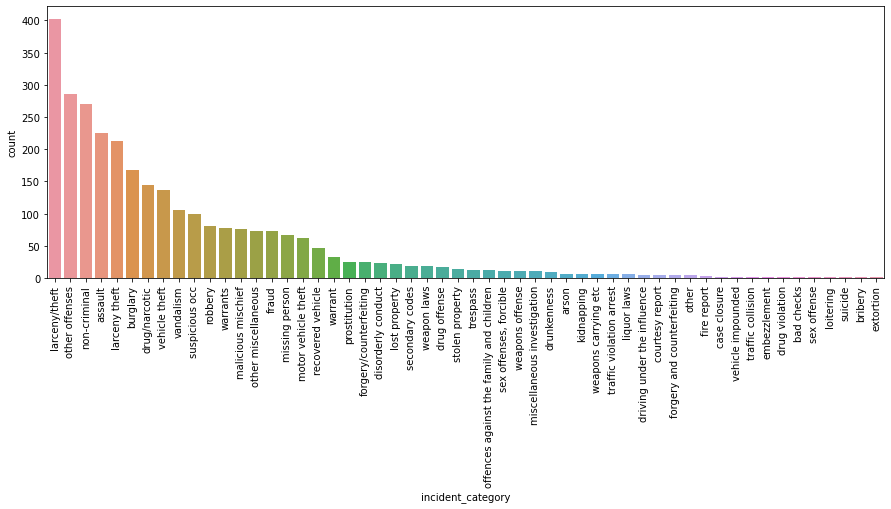

In [22]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x = crime_df['incident_category'] ,  orient='v', order = crime_df['incident_category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [23]:
crime_df['latitude'] = crime_df['latitude'].astype(float)
crime_df['longitude'] = crime_df['longitude'].astype(float)

In [38]:
fig = px.scatter_mapbox(crime_df, 
                        lat="latitude", 
                        lon="longitude", 
                        #color can filter data by year and by category
                        color="incident_year",
                        zoom=10, 
                        height=1000,
                        width=800)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

[Text(0, 0, '2022'),
 Text(1, 0, '2021'),
 Text(2, 0, '2020'),
 Text(3, 0, '2019'),
 Text(4, 0, '2018'),
 Text(5, 0, '2017'),
 Text(6, 0, '2016'),
 Text(7, 0, '2015'),
 Text(8, 0, '2014'),
 Text(9, 0, '2013'),
 Text(10, 0, '2012'),
 Text(11, 0, '2011'),
 Text(12, 0, '2010'),
 Text(13, 0, '2009'),
 Text(14, 0, '2008'),
 Text(15, 0, '2007'),
 Text(16, 0, '2006'),
 Text(17, 0, '2005'),
 Text(18, 0, '2004'),
 Text(19, 0, '2003'),
 Text(20, 0, '2002')]

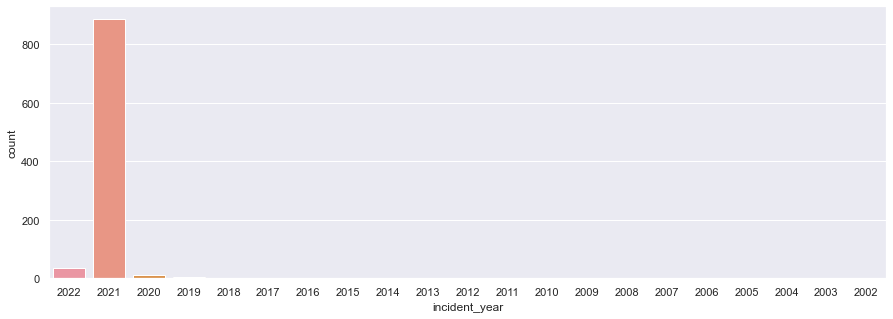

In [78]:
year_order = ['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012',
              '2011','2010','2009','2008','2007','2006','2005','2004','2003','2002']

plt.figure(figsize=(15,5))
ax = sns.countplot(x = crime_df['incident_year'] ,  orient='V', order = year_order)
ax.set_xticklabels(ax.get_xticklabels())

<Figure size 576x360 with 0 Axes>

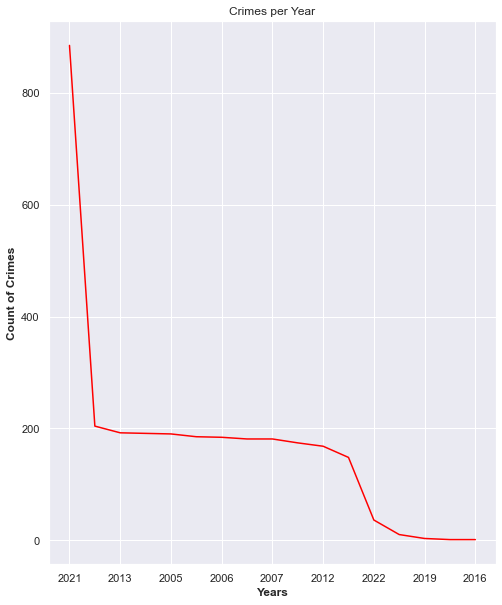

<Figure size 576x360 with 0 Axes>

In [80]:
crime_df['incident_year'].value_counts().plot(color="red")
plt.xlabel("Years", fontweight='bold')
plt.ylabel("Count of Crimes", fontweight='bold')
plt.title("Crimes per Year")
plt.figure(figsize=(8, 5))